<a href="https://colab.research.google.com/github/Eunjung-Cho/mathstudy/blob/main/%EC%8B%A4%ED%97%98/%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EC%8B%A4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주기성 상관계수 실험

- sample_df 
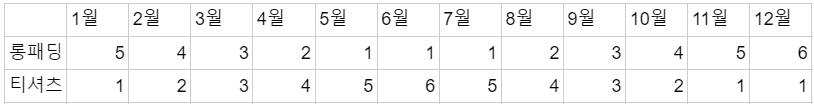


In [ ]:
import pandas as pd
import numpy as np

#### 구글 sheet랑 연결

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('sample_df').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
sample_df = pd.DataFrame.from_records(rows)

[['5', '4', '3', '2', '1', '1', '1', '2', '3', '4', '5', '6'], ['1', '2', '3', '4', '5', '6', '5', '4', '3', '2', '1', '1']]


## 1) 샘플데이터 확인

In [ ]:
sample_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,5,4,3,2,1,1,1,2,3,4,5,6
1,1,2,3,4,5,6,5,4,3,2,1,1


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       2 non-null      object
 2   2       2 non-null      object
 3   3       2 non-null      object
 4   4       2 non-null      object
 5   5       2 non-null      object
 6   6       2 non-null      object
 7   7       2 non-null      object
 8   8       2 non-null      object
 9   9       2 non-null      object
 10  10      2 non-null      object
 11  11      2 non-null      object
dtypes: object(12)
memory usage: 320.0+ bytes


In [ ]:
sample_df1 = sample_df.astype(int)


### x,y 변수 설정

- sample_X 는 첫번째 행 (롱패딩 데이터)
- sample_Y 는 두번째 행 (티셔츠 데이터)

In [ ]:
sample_X = sample_df1.loc[0].values

In [ ]:
sample_Y = sample_df1.loc[1].values

## 2) 상관그래프
- 롱패딩(sample_X)과 티셔츠(sample_Y)와의 상관그래프

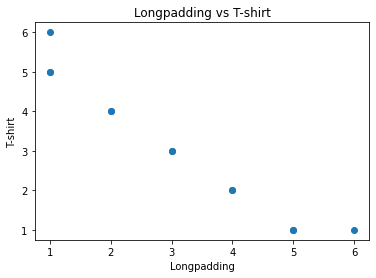

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(sample_X, sample_Y) 
plt.title('Longpadding vs T-shirt')
plt.xlabel('Longpadding')
plt.ylabel('T-shirt')
plt.show()

## 3) 상관계수
- 롱패딩(sample_X)과 티셔츠(sample_Y)와의 상관계수

In [ ]:
np.corrcoef(sample_X,sample_Y)[0,1]

-0.9746835443037978

# 네이버 검색량, LQ 매출량 상관계수 확인

- 키워드: 호보 
- 기간: 2020년도 1~12월
- 변수 x -> 네이버 검색량 ("호보" )
- 변수 y -> LQ 매출량 ("호보")

x1, y1 : 1월 의미  
x12, y12 : 12월 의미

## Tableau 대시보드 확인

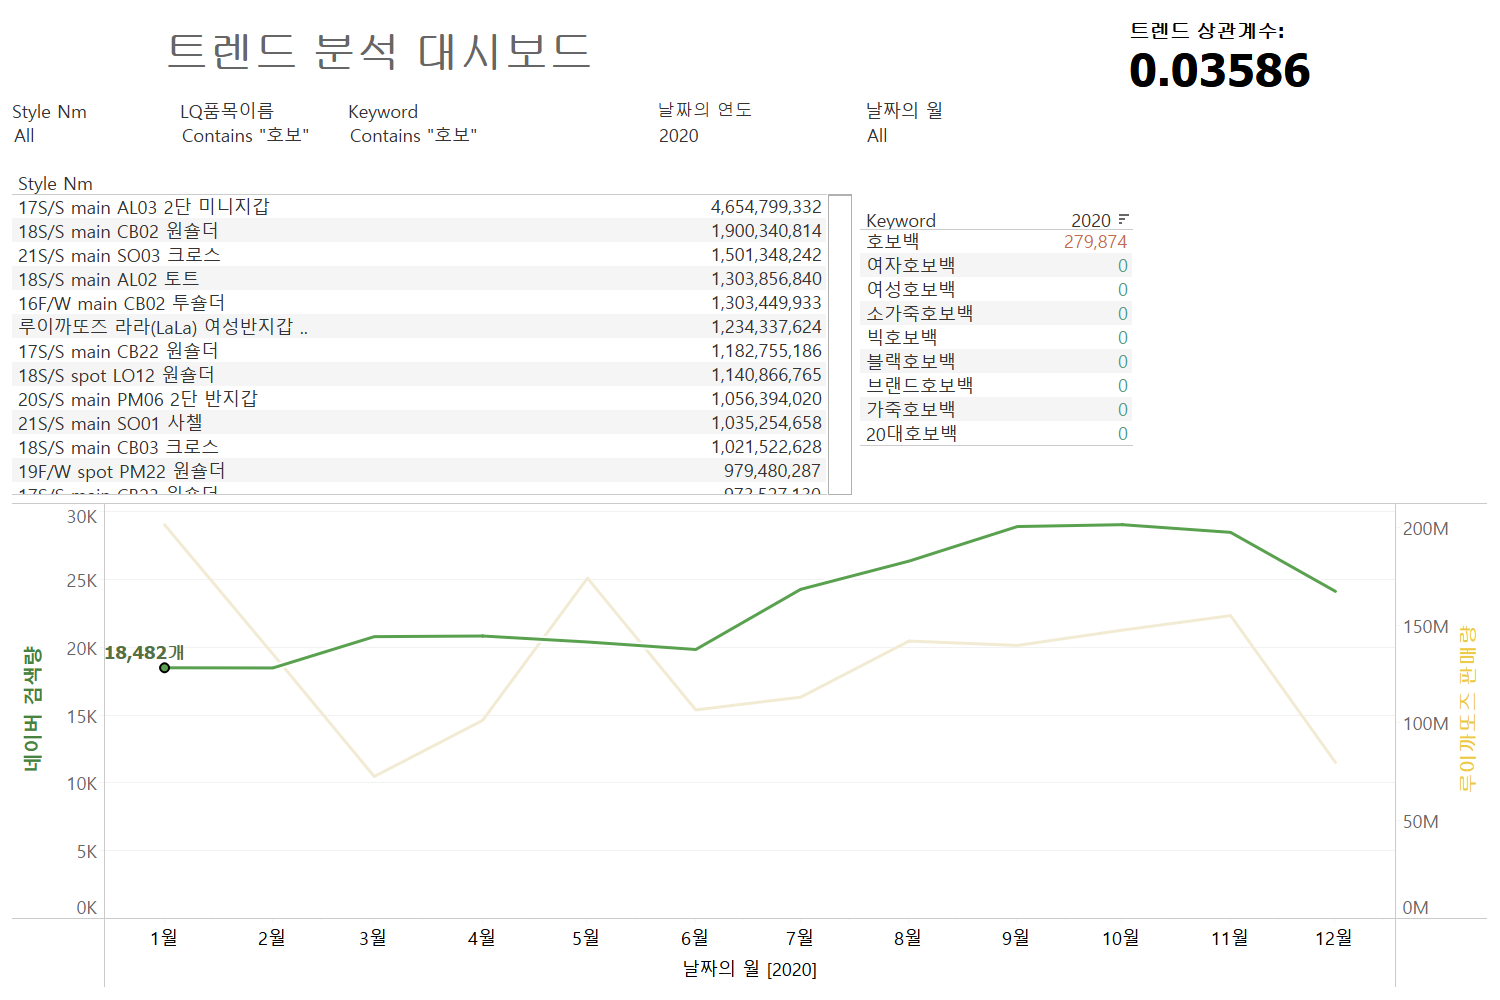

## 위의 대시보드(아래 상관그래프 sheet)에 해당되는 데이터만 추출

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DB/상관계수실험.csv', encoding='utf-8', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,18482,18468,20776,20824,20383,19830,24264,26345,28893,29030,28464,24115
1,201427168,135240240,72622000,101326200,174088536,106686892,113202000,141902727,139678924,147472600,154908083,79799363


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
 3   3       2 non-null      int64
 4   4       2 non-null      int64
 5   5       2 non-null      int64
 6   6       2 non-null      int64
 7   7       2 non-null      int64
 8   8       2 non-null      int64
 9   9       2 non-null      int64
 10  10      2 non-null      int64
 11  11      2 non-null      int64
dtypes: int64(12)
memory usage: 320.0 bytes


## 변수 설정

### X : 네이버 검색량

In [ ]:
X = df.loc[0].values
X

array([18482, 18468, 20776, 20824, 20383, 19830, 24264, 26345, 28893,
       29030, 28464, 24115])

### Y: LQ 매출량

In [ ]:
Y = df.loc[1].values
Y

array([201427168, 135240240,  72622000, 101326200, 174088536, 106686892,
       113202000, 141902727, 139678924, 147472600, 154908083,  79799363])

## X,Y 상관그래프 다시 확인

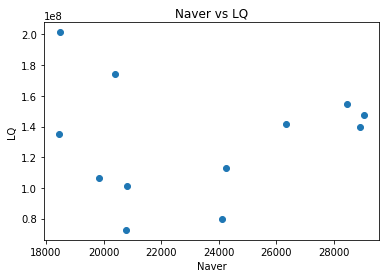

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, Y) 
plt.title('Naver vs LQ')
plt.xlabel('Naver')
plt.ylabel('LQ')
plt.show()

## X,Y 상관계수

In [ ]:
cov = (np.sum(X*Y) - len(X)*np.mean(X)*np.mean(Y)) / len(X)
corr = cov / (np.std(X) * np.std(Y))
corr

0.03586290909542203

### +) numpy 라이브러리 식으로 계산

In [ ]:
np.corrcoef(X,Y)[0,1]

0.035862909095422